In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def read_image(file_path: str):
    image = cv2.imread(file_path, cv2.IMREAD_COLOR)
    if image is not None:
        print(f"Đã đọc ảnh thành công từ: {file_path}")
    else:
        print(f"Lỗi: Không thể đọc ảnh từ: {file_path}")
    return image

In [3]:
file_path1 = r'C:\Users\anhng\.spyder-py3\CV-Opencv\imgs\keanu\keanu1.jpg'
file_path2 = r'C:\Users\anhng\.spyder-py3\CV-Opencv\imgs\keanu\keanu2.jpg'

image1 = read_image(file_path1)
image2 = read_image(file_path2)

Đã đọc ảnh thành công từ: C:\Users\anhng\.spyder-py3\CV-Opencv\imgs\keanu\keanu1.jpg
Đã đọc ảnh thành công từ: C:\Users\anhng\.spyder-py3\CV-Opencv\imgs\keanu\keanu2.jpg


Đã phát hiện 1 khuôn mặt.


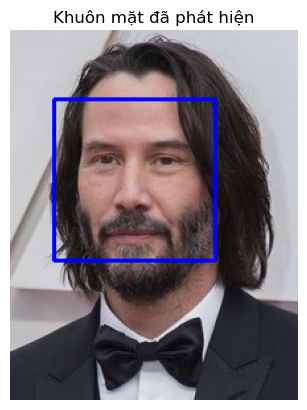

In [4]:
def detect_faces(image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
    if len(faces) > 0:
        print(f"Đã phát hiện {len(faces)} khuôn mặt.")
    else:
        print("Không phát hiện khuôn mặt nào.")
    
    return faces
    
if image1 is not None:
    faces1 = detect_faces(image1)
    
    # Hiển thị ảnh với các khuôn mặt đã được đánh dấu
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Khuôn mặt đã phát hiện')
    plt.show()

In [14]:
#hàm kiểm tra và so sánh
def compare_faces(image1, image2):
    faces1 = detect_faces(image1)
    faces2 = detect_faces(image2)
    
    if len(faces1) == 0 and len(faces2) == 0:
        return "Không tìm thấy khuôn mặt ở cả 2 ảnh."
    elif len(faces1) == 0:
        return "Ảnh 1 không tìm thấy khuôn mặt."
    elif len(faces2) == 0:
        return "Ảnh 2 không tìm thấy khuôn mặt."

    if len(faces1) == len(faces2):
        return "Cùng 1 người."
    else:
        return "2 người khác nhau."

#trả về kết quả
print("kết quả chương trình: " + compare_faces(image1, image2))

Đã phát hiện 1 khuôn mặt.
Đã phát hiện 1 khuôn mặt.
kết quả chương trình: Cùng 1 người.
